In [3]:
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd
# import Patch


import sys
sys.path.append('../../')

from draw_figures import plot_rmse_boxplots

plt.style.use('../style.mpl')

In [4]:
def read_npz_files_in_s_folders(directory):
    data_files = {}
    for item in os.scandir(directory):
        if item.is_dir() and item.name.endswith(''):
            npz_path = os.path.join(item.path, 'data.npz')
            if os.path.exists(npz_path):
                data = np.load(npz_path)
                data_files[item.name] = data
    
    return data_files

# Example usage
data_files = read_npz_files_in_s_folders('../results/wiener_m')
print(data_files.keys())


dict_keys(['iEKF', 'GGF_weight15', 'GGF4e-4', 'PLF', 'GGF6e-4', 'UKF', 'GGF_weight20', 'GGF7e-4', 'GGF9e-4', 'GGF_weight25', 'GGF_huber5', 'GGF_huber10', 'GGF_huber3', 'GGF_huber15', 'GGF5e-4', 'GGF_weight18', 'GGF', 'EKF'])


In [5]:
armse_ekf = np.mean(np.sqrt(np.mean((data_files['EKF']['x_mc'] - 
                                             data_files['EKF']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_ukf = np.mean(np.sqrt(np.mean((data_files['UKF']['x_mc'] - 
                                             data_files['UKF']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_iekf = np.mean(np.sqrt(np.mean((data_files['iEKF']['x_mc'] - 
                                             data_files['iEKF']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_plf = np.mean(np.sqrt(np.mean((data_files['PLF']['x_mc'] - 
                                             data_files['PLF']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_ggf = np.mean(np.sqrt(np.mean((data_files['GGF']['x_mc'] - 
                                             data_files['GGF']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_beta_5e_4 = np.mean(np.sqrt(np.mean((data_files['GGF6e-4']['x_mc'] - 
                                             data_files['GGF6e-4']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_beta_7e_4 = np.mean(np.sqrt(np.mean((data_files['GGF7e-4']['x_mc'] - 
                                             data_files['GGF7e-4']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_beta_9e_4 = np.mean(np.sqrt(np.mean((data_files['GGF9e-4']['x_mc'] - 
                                             data_files['GGF9e-4']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_huber_3 = np.mean(np.sqrt(np.mean((data_files['GGF_huber3']['x_mc'] - 
                                             data_files['GGF_huber3']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_huber_5 = np.mean(np.sqrt(np.mean((data_files['GGF_huber5']['x_mc'] - 
                                             data_files['GGF_huber5']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_huber_10 = np.mean(np.sqrt(np.mean((data_files['GGF_huber10']['x_mc'] - 
                                             data_files['GGF_huber10']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_huber_15 = np.mean(np.sqrt(np.mean((data_files['GGF_huber15']['x_mc'] - 
                                             data_files['GGF_huber15']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_weight_15 = np.mean(np.sqrt(np.mean((data_files['GGF_weight15']['x_mc'] - 
                                             data_files['GGF_weight15']['x_hat_mc'])**2, axis=(1))), axis=1)         
armse_weight_20 = np.mean(np.sqrt(np.mean((data_files['GGF_weight20']['x_mc'] - 
                                             data_files['GGF_weight20']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_weight_25 = np.mean(np.sqrt(np.mean((data_files['GGF_weight25']['x_mc'] - 
                                             data_files['GGF_weight25']['x_hat_mc'])**2, axis=(1))), axis=1)
                            
armse_values = [
    armse_ekf,
    armse_ukf,
    armse_plf,
    armse_ggf,
    armse_beta_5e_4,
    armse_beta_7e_4,
    armse_beta_9e_4,
    armse_huber_3,
    armse_huber_5,
    armse_huber_10,
    armse_weight_15,
    armse_weight_20,
    armse_weight_25,
]
# print(armse_values.keys())
# print(armse_values.items())

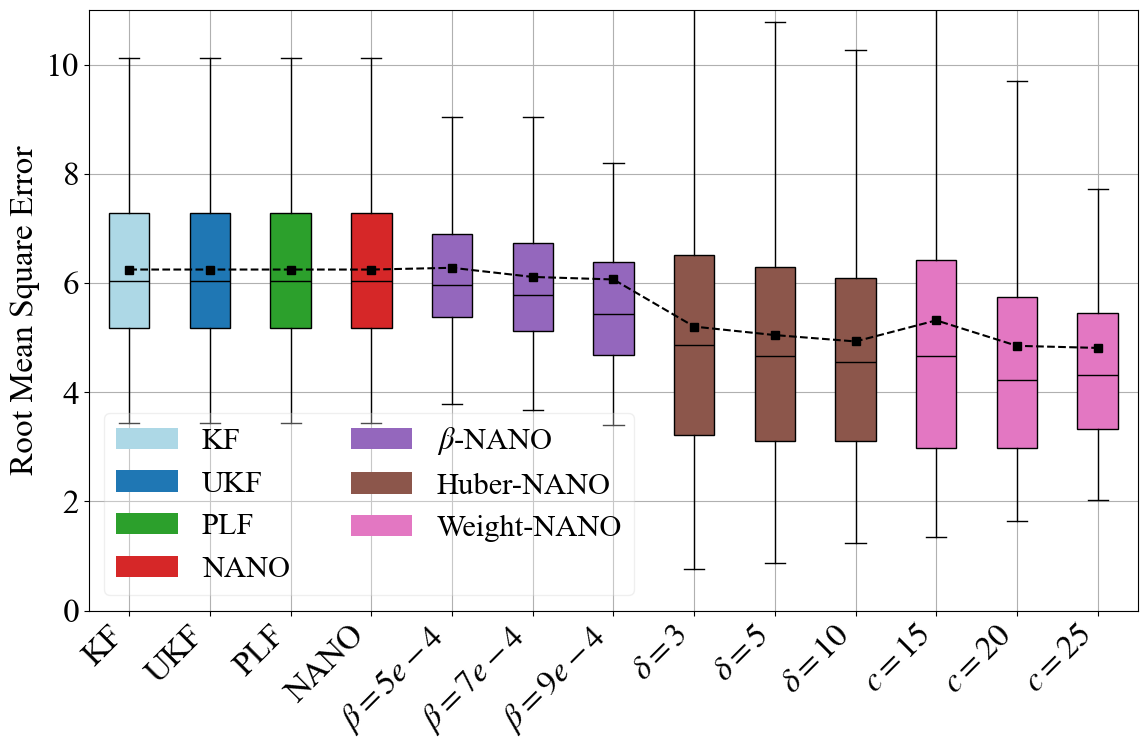

In [6]:
from matplotlib.patches import Patch
from matplotlib.ticker import ScalarFormatter
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['font.size'] = 24
xlab1 = r'$\beta$'
variable_names = ['KF', 'UKF', 'PLF','NANO', r'$\beta=5e-4$', r'$\beta=7e-4$', r'$\beta=9e-4$', 
                  r'$\delta=3$', r'$\delta=5$', r'$\delta=10$', r'$c=15$', r'$c=20$', r'$c=25$']
label = ['KF', 'UKF', 'PLF','NANO', r'$\beta$'+'-NANO', 'Huber-NANO', 'Weight-NANO']
plt.figure(figsize=(12, 8))
# plt.yscale('log')
box = plt.boxplot(armse_values, vert=True, patch_artist=True, showfliers=False)  # 'patch_artist=True' fills the box with color
colors = ['lightblue']+['C0']+['C2']+['C3']+['C4']*3+['C5']*3+['C6']*3
for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
for median in box['medians']:
    median.set_color('black')
means = [np.mean(datapoint) for datapoint in armse_values]
plt.plot(range(1, len(armse_values) + 1), means, marker='s', linestyle='--', color='black', label='Mean')
plt.xticks(ticks=range(1, len(armse_values) + 1), labels=variable_names, rotation=45, ha='right')
# plt.xlabel(xlab1) 
# plt.xlabel('Method')
plt.ylabel('Root Mean Square Error')
plt.ylim(0, 11)
plt.grid(True)
legend_elements = [Patch(facecolor=colors[0], label=label[0]),
                    Patch(facecolor=colors[1], label=label[1]),
                    Patch(facecolor=colors[2], label=label[2]),
                    Patch(facecolor=colors[3], label=label[3]),
                    Patch(facecolor=colors[4], label=label[4]),
                    Patch(facecolor=colors[7], label=label[5]),
                    Patch(facecolor=colors[10], label=label[6]),]
plt.legend(handles=legend_elements, loc='lower left', ncol=2, fontsize=22, framealpha=0.3)
# plt.show()
plt.tight_layout()
plt.savefig('../figures/wiener_m/wiener_m.pdf', bbox_inches='tight')

In [7]:
def read_json_from_folders(base_path):
    """
    Reads JSON files from folders within the base_path. It also reads a JSON file
    located directly in the base_path. The data is stored in a dictionary keyed
    by the folder name.

    :param base_path: The base directory that contains the folders and JSON file.
    :return: A dictionary with the folder name as the key and the JSON content as the value.
    """
    json_data = {}

    # Check for a JSON file in the base directory
    for item in os.listdir(base_path):
        if item.endswith('.json'):
            file_path = os.path.join(base_path, item)
            with open(file_path, 'r') as json_file:
                # Assuming the file name format is "FolderName-Description.json"
                folder_name = item.split('-')[0]
                json_data[folder_name] = json.load(json_file)

    # Read JSON data from each folder
    for folder_name in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder_name)
        if os.path.isdir(folder_path):
            # Look for a JSON file inside this folder
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.json'):
                    file_path = os.path.join(folder_path, file_name)
                    with open(file_path, 'r') as json_file:
                        json_data[folder_name] = json.load(json_file)

    return json_data

# Usage
# Replace 'path_to_wiener_results' with the actual path to the 'wiener_results' directory
path_to_wiener_results = r'../results/wiener_m'
air_traffic_json_data = read_json_from_folders(path_to_wiener_results)

# Now wiener_json_data contains the JSON content, keyed by folder name


In [8]:
start_step = 0
def get_error(name):
    error = data_files[name]['x_mc'][:][start_step:,:] - data_files[name]['x_hat_mc'][:][start_step:,:]
    return error

In [9]:
ekf_error = get_error('EKF')
ekf_error.shape, data_files.keys()
# ekf_error0 =ekf_error[:,:,0]
# len(ekf_error0[0]), ekf_error.shape[1]

((100, 150, 4),
 dict_keys(['iEKF', 'GGF_weight15', 'GGF4e-4', 'PLF', 'GGF6e-4', 'UKF', 'GGF_weight20', 'GGF7e-4', 'GGF9e-4', 'GGF_weight25', 'GGF_huber5', 'GGF_huber10', 'GGF_huber3', 'GGF_huber15', 'GGF5e-4', 'GGF_weight18', 'GGF', 'EKF']))

In [10]:
name = ['EKF', 'UKF', 'PLF', 'GGF', 'GGF7e-4', 'GGF_huber5', 'GGF_weight20']
# name = ['ekf_s', 'ukf_s', 'huberukf_s', 'iekf_s', 'convekf0.5_s', 'convukf1_s']
label = ['KF', 'UKF', 'PLF', 'NANO', r'$\beta$'+'-NANO', 'Huber-NANO', 'Weight-NANO']
# colors = ['lightblue']+['C0']+['C1']+['C2'] + ['C4']+['C6']
colors = ['lightblue']+['C0']+['C2']+['C3']+['C4']+['C5']+['C6']
pd0_list, pd1_list, pd2_list, pd3_list, pd4_list, pd5_list, pd6_list= [], [], [], [], [], [], []
pd_list = [pd0_list, pd1_list, pd2_list, pd3_list, pd4_list, pd5_list, pd6_list]
ekf_error = get_error('EKF')
# time_length = ekf_error.shape[1]
time_length = 61
print(ekf_error.shape)
for tmp in range(len(name)): # 
    # if tmp == 2:
    #     continue
    for i in range(ekf_error.shape[2]): # x_dim
        for j in range(ekf_error.shape[0]): # mc
            pd_list[i].append(pd.DataFrame({'Error': get_error(name[tmp])[j, :time_length, i],
                                            'Algorithm': label[tmp],
                                            'Step': np.arange(time_length),
                                            'Color': colors[tmp]
                                            }))
pd_error0 = pd.concat(pd_list[0])
pd_error1 = pd.concat(pd_list[1])
pd_error2 = pd.concat(pd_list[2])
pd_error3 = pd.concat(pd_list[3])
# pd_error4 = pd.concat(pd_list[4])
# pd_error5 = pd.concat(pd_list[5])
# pd_error6 = pd.concat(pd_list[6])
pd_error0 = pd_error0.reset_index(drop=True)
pd_error1 = pd_error1.reset_index(drop=True)  # Apply reset_index function, drop=False时, 保留旧的索引为index列
pd_error2 = pd_error2.reset_index(drop=True)  # Apply reset_index function, drop=False时, 保留旧的索引为index列
pd_error3 = pd_error3.reset_index(drop=True)
# pd_error4 = pd_error4.reset_index(drop=True)  # Apply reset_index function, drop=False时, 保留旧的索引为index列
# pd_error5 = pd_error5.reset_index(drop=True)
# pd_error6 = pd_error6.reset_index(drop=True)  # Apply reset_index function, drop=False时, 保留旧的索引为index列

(100, 150, 4)


In [11]:
import warnings
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
warnings.filterwarnings('ignore')

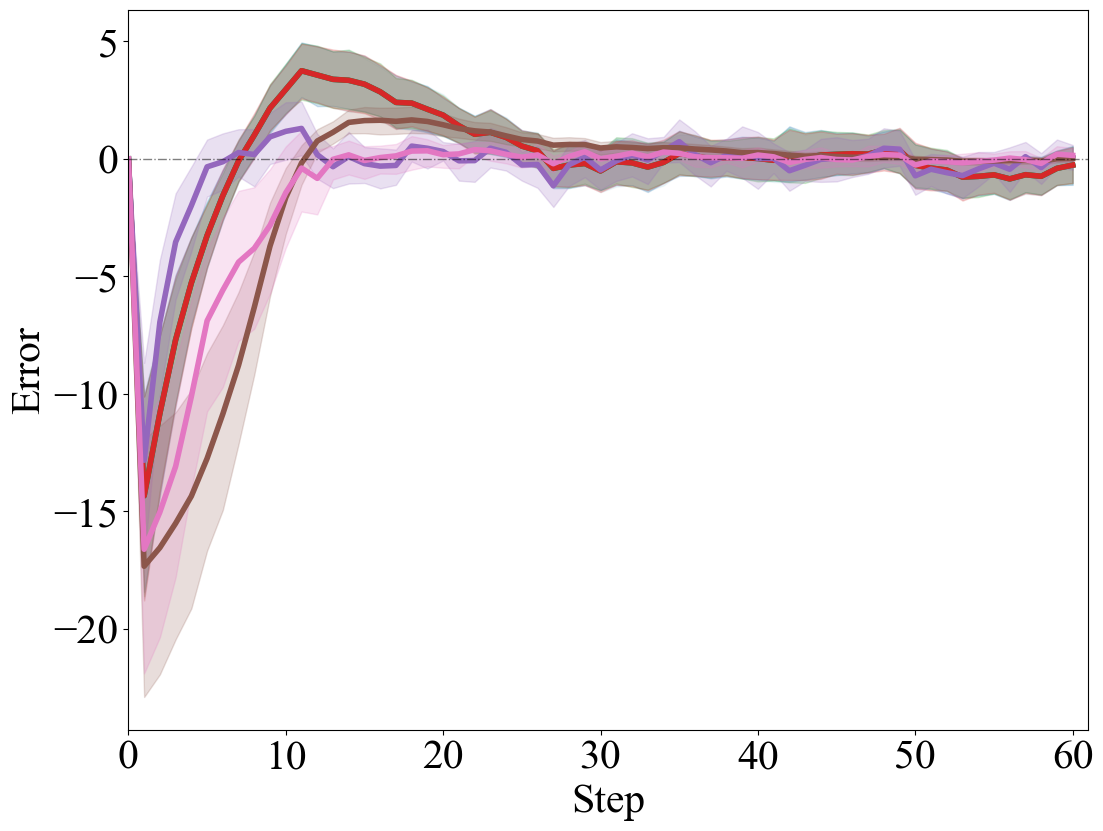

In [12]:
axes_pos = [0.2, 0.2, 0.6, 0.6]
BETA = [0.0001]
palette = sns.color_palette(colors)
font = 30
linestyle = '-'
# legend_elements = [Patch(facecolor=colors[i], label=label[i]) for i in range(len(label))]
legend_elements = [Line2D([0], [0], color=colors[i], lw=4, linestyle=linestyle, label=label[i]) for i in range(len(label))]
f1 = plt.figure(figsize=(16, 12), dpi=100)
ax1 = f1.add_axes(axes_pos)
g1 = sns.lineplot(x='Step', y="Error", hue="Algorithm", style="Algorithm" , data=pd_error0,
                    palette=palette, linewidth=4, dashes=False, legend=False)
ax1.set_ylabel('Error', fontsize=font)
ax1.set_xlabel("Step", fontsize=font)
plt.xlim(0, time_length)
# plt.ylim(-1, 3)
plt.axhline(0, ls='-.', c='k', lw=1, alpha=0.5)
# ax1.set_xticks(4 * np.arange(6))
# ax1.set_xticklabels(('0', '4', '8', '12', '16', '20'), fontsize=font)

handles, labels = ax1.get_legend_handles_labels()

# ax1.legend(handles=handles, labels=labels, fontsize=font)
# ax1.legend(legend_elements)
plt.yticks(fontsize=font)
plt.xticks(fontsize=font)
plt.savefig('../figures/wiener_m/wiener_m_error_1.pdf', bbox_inches='tight')

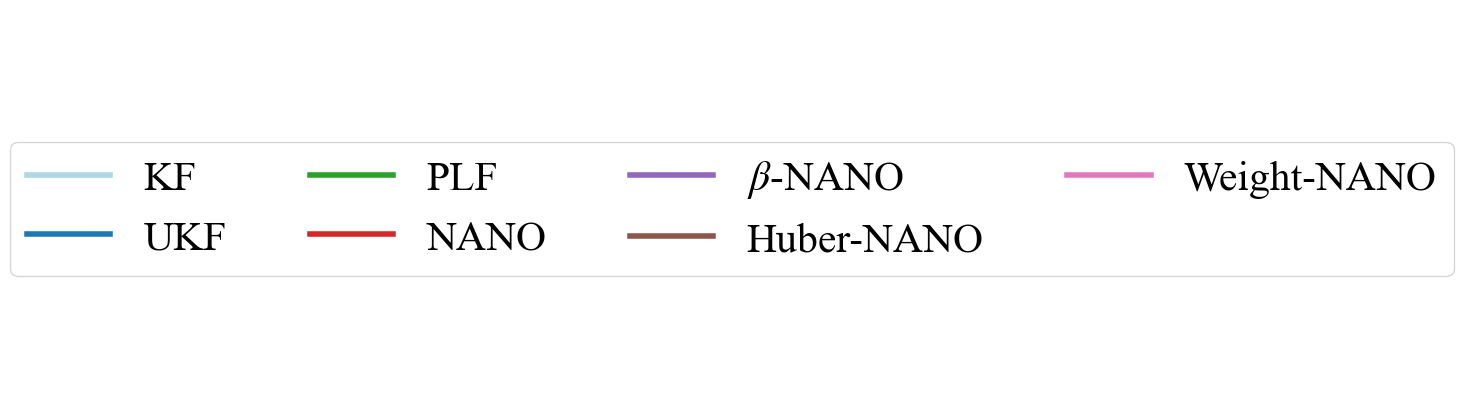

In [13]:
f2 = plt.figure(figsize=(8, 4), dpi=100)
ax2 = f2.add_axes([0, 0, 1, 1])
ax2.legend(handles=legend_elements, loc='center', fontsize=font, ncol=4)
ax2.axis('off')
plt.savefig('../figures/wiener_m/wiener_legend.pdf', bbox_inches='tight')

In [14]:
# Example usage
data_files = read_npz_files_in_s_folders('../results/wiener')
print(data_files.keys())

dict_keys(['PLF', 'UKF', 'GGF', 'EKF'])


In [15]:
armse_ekf = np.mean(np.sqrt(np.mean((data_files['EKF']['x_mc'] - 
                                             data_files['EKF']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_ukf = np.mean(np.sqrt(np.mean((data_files['UKF']['x_mc'] - 
                                             data_files['UKF']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_plf = np.mean(np.sqrt(np.mean((data_files['PLF']['x_mc'] - 
                                             data_files['PLF']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_ggf = np.mean(np.sqrt(np.mean((data_files['GGF']['x_mc'] - 
                                             data_files['GGF']['x_hat_mc'])**2, axis=(1))), axis=1)                                   
armse_values = [
    armse_ekf,
    armse_ukf,
    armse_plf,
    armse_ggf,
]

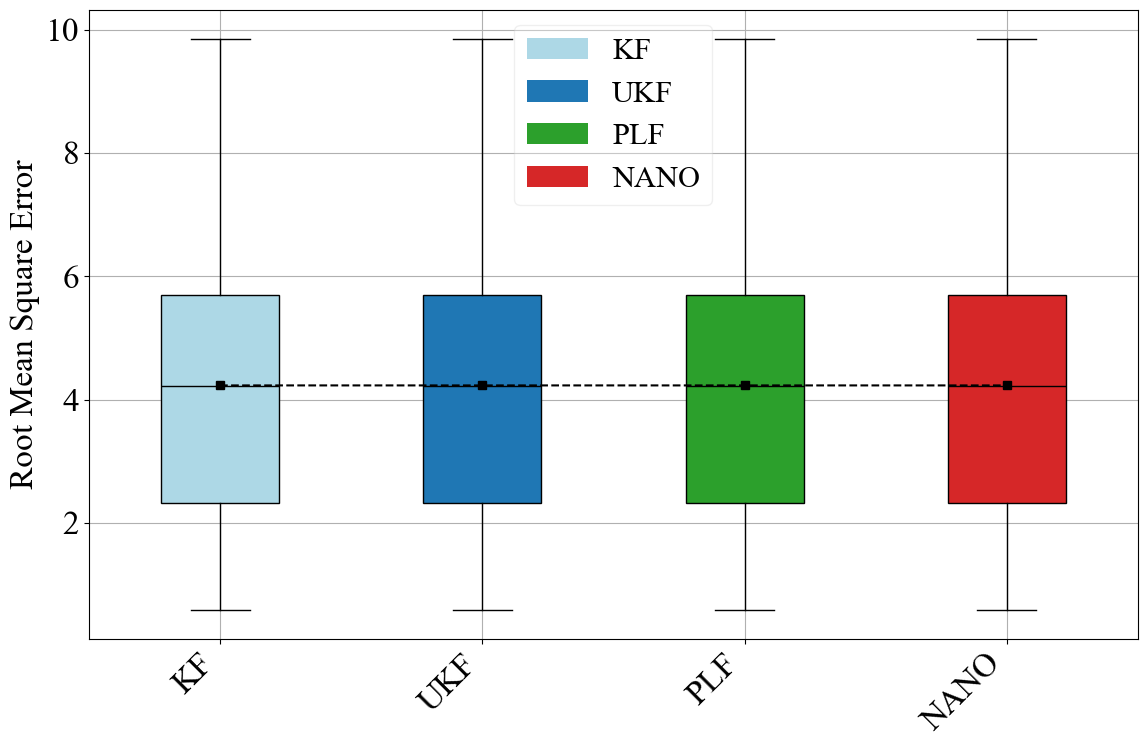

In [16]:
from matplotlib.patches import Patch
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['font.size'] = 24
xlab1 = r'$\beta$'
variable_names = ['KF', 'UKF','PLF', 'NANO']
label = ['KF', 'UKF','PLF', 'NANO']
plt.figure(figsize=(12, 8))
# plt.yscale('log')
box = plt.boxplot(armse_values, vert=True, patch_artist=True, showfliers=False)  # 'patch_artist=True' fills the box with color
colors = ['lightblue']+['C0']+['C2']+['C3']
for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
for median in box['medians']:
    median.set_color('black')
means = [np.mean(datapoint) for datapoint in armse_values]
plt.plot(range(1, len(armse_values) + 1), means, marker='s', linestyle='--', color='black', label='Mean')
plt.xticks(ticks=range(1, len(armse_values) + 1), labels=variable_names, rotation=45, ha='right')
# plt.xlabel(xlab1) 
# plt.xlabel('Method')
plt.ylabel('Root Mean Square Error')
# plt.ylim(ylims[i])
plt.grid(True)
legend_elements = [Patch(facecolor=colors[0], label=label[0]),
                    Patch(facecolor=colors[1], label=label[1]),
                    Patch(facecolor=colors[2], label=label[2]),
                    Patch(facecolor=colors[3], label=label[3]),]
plt.legend(handles=legend_elements, fontsize=22, framealpha=0.3)
# plt.show()
plt.tight_layout()
plt.savefig('../figures/wiener/wiener.pdf', bbox_inches='tight')

In [18]:
path_to_wiener_results = r'../results/wiener'
air_traffic_json_data = read_json_from_folders(path_to_wiener_results)

In [20]:
name = ['EKF', 'UKF','PLF', 'GGF']
# name = ['ekf_s', 'ukf_s', 'huberukf_s', 'iekf_s', 'convekf0.5_s', 'convukf1_s']
label = ['KF', 'UKF','PLF', 'NGGF']
# colors = ['lightblue']+['C0']+['C1']+['C2'] + ['C4']+['C6']
colors = ['lightblue']+['C0']+['C2']+['C3']
pd0_list, pd1_list, pd2_list, pd3_list, pd4_list, pd5_list, pd6_list= [], [], [], [], [], [], []
pd_list = [pd0_list, pd1_list, pd2_list, pd3_list, pd4_list, pd5_list, pd6_list]
ekf_error = get_error('EKF')
time_length = ekf_error.shape[1]
print(ekf_error.shape)
for tmp in range(len(name)): # 
    # if tmp == 2:
    #     continue
    for i in range(ekf_error.shape[2]): # x_dim
        for j in range(ekf_error.shape[0]): # mc
            pd_list[i].append(pd.DataFrame({'Error': get_error(name[tmp])[j, :, i],
                                            'Algorithm': label[tmp],
                                            'Step': np.arange(time_length),
                                            'Color': colors[tmp]
                                            }))
pd_error0 = pd.concat(pd_list[0])
pd_error1 = pd.concat(pd_list[1])
pd_error2 = pd.concat(pd_list[2])
pd_error3 = pd.concat(pd_list[3])

pd_error0 = pd_error0.reset_index(drop=True)
pd_error1 = pd_error1.reset_index(drop=True)  # Apply reset_index function, drop=False时, 保留旧的索引为index列
pd_error2 = pd_error2.reset_index(drop=True)  
pd_error3 = pd_error3.reset_index(drop=True)

(100, 150, 4)


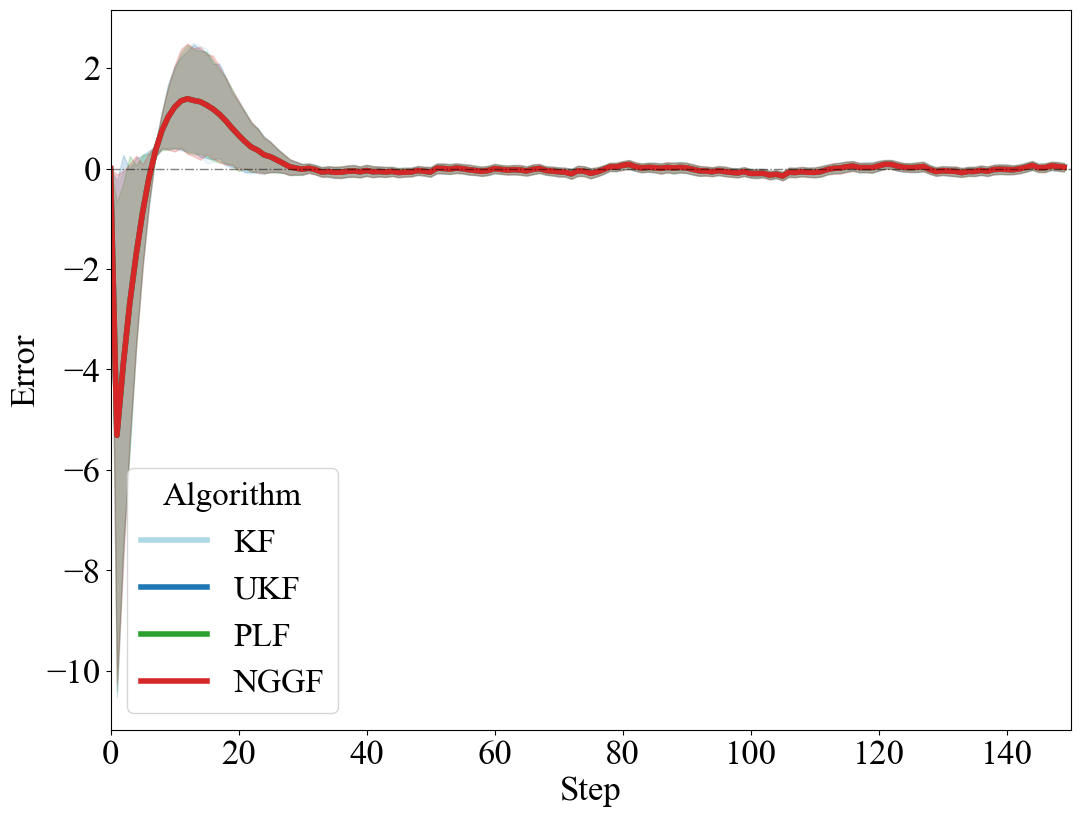

In [21]:
axes_pos = [0.2, 0.2, 0.6, 0.6]
BETA = [0.0001]
palette = sns.color_palette(colors)
font = 25
legend_elements = [Patch(facecolor=colors[i], label=label[i]) for i in range(len(label))]
f1 = plt.figure(figsize=(16, 12), dpi=100)
ax1 = f1.add_axes(axes_pos)
g1 = sns.lineplot(x='Step', y="Error", hue="Algorithm", style="Algorithm" , data=pd_error0,
                    palette=palette, linewidth=4, dashes=False)
ax1.set_ylabel('Error', fontsize=font)
ax1.set_xlabel("Step", fontsize=font)
plt.xlim(0, time_length)
# plt.ylim(-1, 3)
plt.axhline(0, ls='-.', c='k', lw=1, alpha=0.5)
# ax1.set_xticks(4 * np.arange(6))
# ax1.set_xticklabels(('0', '4', '8', '12', '16', '20'), fontsize=font)
handles, labels = ax1.get_legend_handles_labels()
# ax1.legend(handles=handles, labels=labels, fontsize=font)
# ax1.legend(legend_elements)
plt.yticks(fontsize=font)
plt.xticks(fontsize=font)
plt.savefig('../figures/wiener/wiener_error_1.pdf', bbox_inches='tight')